##For My implementation of t-SNE link,
https://colab.research.google.com/drive/16K_3rN4NTKDKvMBTFKoaDFqtHt7iBtAv

## Attempt to reduce Image using CNN is as follows

#### Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Add,Activation

#### Importing dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/MNIST Dataset/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/MNIST Dataset/test.csv")
train_labels = train_df['label']
train_dataset = train_df.drop('label',axis=1)
X = np.array(train_dataset).reshape(train_df.shape[0],28,28,1)
Y = np.array(train_labels).reshape(train_df.shape[0],1)

In [ ]:
train_df.shape
# So we have 42000 points

(42000, 785)

In [ ]:
X.shape

(42000, 28, 28, 1)

#### Here's is how our data looks like?

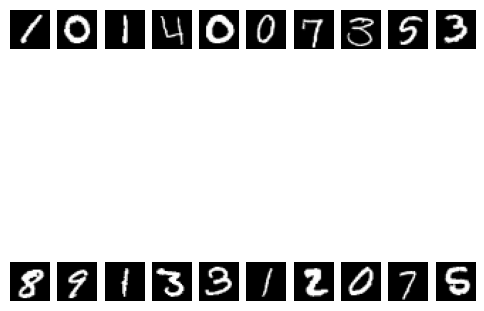

In [ ]:
f , ax = plt.subplots(2,10,figsize=(6,6))

for i,ax in enumerate(ax.flat):
  ax.axis('off')
  ax.imshow(X[i,:,:,0],cmap="gray")

#### Now our implementation

In [ ]:
def model():
    
    inputs = Input(shape=(28,28,1))
    #Ok so we took the input image
    x = Conv2D(24,kernel_size=(3,3),padding='same',activation="relu")(inputs)
    #now we did the the convoution on image with kernel(3,3),and we take 24 such kernel/filter and padding-same means,
    #no extra-padding and relu means the negative values treated as 0,the ouput is called as feature map
    #28x28x24
    print(x)

    x = MaxPooling2D(pool_size=(2, 2))(x)
    #So we took the max value from each 2x2 window of the feature map
    #14x14x26
    x = Conv2D(48, (3, 3), padding='same',activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    # x = Conv2D(64, (3, 3), padding='same',activation='relu')(x)
    # x = MaxPooling2D(pool_size=(2, 2))(x)
    # print(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.25)(x)
    num_classes=1
    output = Dense(num_classes,activation="softmax")(x)
    
    model = Model(inputs,output)
    
    model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
    
    return model

#### Fitting the model with data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20, random_state=42)
epochs = 20
batch_size=256

model1 = model()
history = model1.fit(X_train,y_train,
         epochs=epochs,
         batch_size=batch_size,
         validation_data=(X_test,y_test))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


132/132 [==============================] - 16s 24ms/step - loss: 0.0000e+00 - accuracy: 0.1124 - val_loss: 0.0000e+00 - val_accuracy: 0.1082
Epoch 2/20
132/132 [==============================] - 2s 19ms/step - loss: 0.0000e+00 - accuracy: 0.1124 - val_loss: 0.0000e+00 - val_accuracy: 0.1082
Epoch 3/20
132/132 [==============================] - 3s 20ms/step - loss: 0.0000e+00 - accuracy: 0.1124 - val_loss: 0.0000e+00 - val_accuracy: 0.1082
Epoch 4/20
132/132 [==============================] - 3s 20ms/step - loss: 0.0000e+00 - accuracy: 0.1124 - val_loss: 0.0000e+00 - val_accuracy: 0.1082
Epoch 5/20
132/132 [==============================] - 3s 20ms/step - loss: 0.0000e+00 - accuracy: 0.1124 - val_loss: 0.0000e+00 - val_accuracy: 0.1082
Epoch 6/20
132/132 [==============================] - 2s 19ms/step - loss: 0.0000e+00 - accuracy: 0.1124 - val_loss: 0.0000e+00 - val_accuracy: 0.1082
Epoch 7/20
132/132 [==============================] - 3s 20ms/step - loss: 0.0000e+00 - accuracy: 0.1124

In [ ]:
model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_22 (Conv2D)             (None, 28, 28, 32)   320         ['input_6[0][0]']                
                                                                                                  
 conv2d_23 (Conv2D)             (None, 28, 28, 32)   9248        ['conv2d_22[0][0]']              
                                                                                                  
 conv2d_24 (Conv2D)             (None, 28, 28, 32)   9248        ['conv2d_23[0][0]']              
                                                                                            

#### Reducing the Image

In [ ]:
layer_outputs = [layer.output for layer in model1.layers[1:5]]
activation_model = Model(inputs=model1.input,outputs=layer_outputs)

convluted_img_arr = []
for i in range(400):
    img = X[i].reshape(1,28,28,1)
    activations = activation_model.predict(img)
    print(activations)
    layer_names = []
    for layer in model1.layers[1:5]:
        layer_names.append(layer.name)

    for j in range(4):
        if j == 1:
            layer_activation = activations[j]
            n_features = layer_activation.shape[-1]
            size = layer_activation.shape[1]
            channel_image = layer_activation[0,:, :, 0]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            # plt.imshow(channel_image)
            img_coll=channel_image
            convluted_img_arr.append(img_coll)
           
  


In [ ]:
convluted_img_arr=np.array(convluted_img_arr)
print(convluted_img_arr.shape)
y_test=Y[:12000]
y_test=np.array([y[0] for y in y_test])
y_test.shape

from tempfile import TemporaryFile
outfile = TemporaryFile()
np.savez('MNIST_Convoluted_14x14', data=convluted_img_arr, target=y_test)

# np.save("ConvolutedImageMNIST",convluted_img_arr)

(12000, 196)


## Please ignore the following lines ,
they are just for testing purpose the above code will serve the purpose

In [ ]:
convluted_img_arr=[]
for i in range(8400):
  layer_outputs = [layer.output for layer in model1.layers[1:5]]
  # print("layers_ouput",layer_outputs)
  activation_model = Model(inputs=model1.input,outputs=layer_outputs)
  # print(activation_model)
  img_coll=np.array([])
  img = X[i].reshape(1,28,28,1)
  activations = activation_model.predict(img)

  layer_names = []
  # print("lets add the convolution and max-pooling layer to layer_names list")
  for layer in model1.layers[1:5]:
      layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
  # print("So append done in list \n let's check it out:",layer_names)

  cnt=0
  for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    cnt+=1
    if cnt==2:
      n_features = layer_activation.shape[-1]
      size = layer_activation.shape[1]
      channel_image = layer_activation[0,:, :, 0]
      channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      plt.imshow(channel_image)
      img_coll=channel_image
      convluted_img_arr.append(img_coll.reshape((14*14))) 
    


(400, 196)


(400,)

4


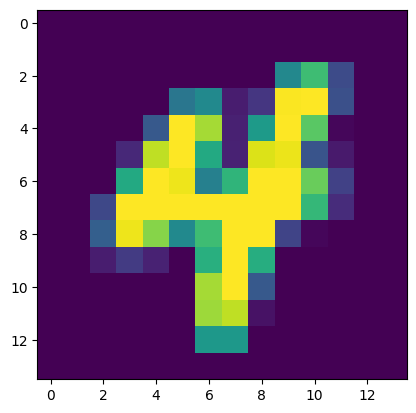

In [ ]:
print(y_test[39])
plt.imshow(convluted_img_arr[39].reshape(14,14))

In [ ]:
from tempfile import TemporaryFile
outfile = TemporaryFile()
np.savez('MNIST_Convoluted_14x14', data=convluted_img_arr, target=y_test)

ATTEMPTS AND QUESTIONS NEEDED TO ASK

1/1 [==============================] - 0s 20ms/step
0	

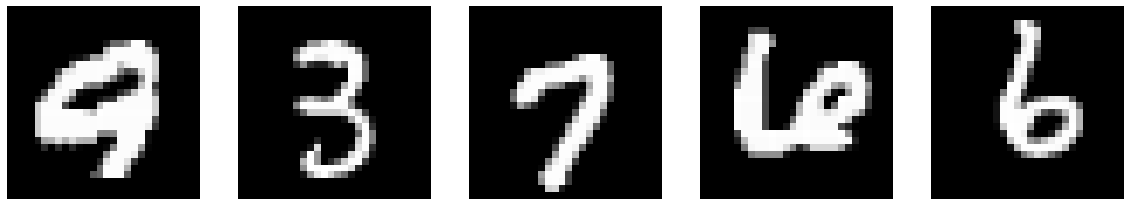

In [ ]:
figure = plt.figure(figsize=(20,20))
for i in range(5):
    figure.add_subplot(1,5,i+1)
    plt.imshow(X_test[i+90,:,:,0],cmap="gray")
    plt.axis("off")
    print(np.squeeze(np.argmax(model1.predict(X_test[i+90].reshape(1,28,28,1)),axis=1),axis=0),end="\t")

In [ ]:
layer_outputs = [layer.output for layer in model1.layers[1:5]]
print("layers_ouput",layer_outputs)
activation_model = Model(inputs=model1.input,outputs=layer_outputs)
print(activation_model)

layers_ouput [<KerasTensor: shape=(None, 28, 28, 24) dtype=float32 (created by layer 'conv2d_16')>, <KerasTensor: shape=(None, 14, 14, 24) dtype=float32 (created by layer 'max_pooling2d_16')>, <KerasTensor: shape=(None, 14, 14, 48) dtype=float32 (created by layer 'conv2d_17')>, <KerasTensor: shape=(None, 7, 7, 48) dtype=float32 (created by layer 'max_pooling2d_17')>]


(-0.5, 27.5, 27.5, -0.5)

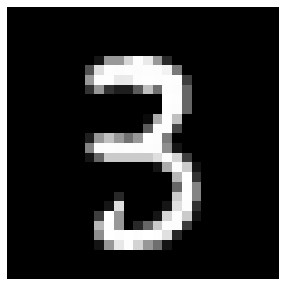

In [ ]:
img = X_test[91].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img[0,:,:,0],cmap="gray")
plt.axis('off')

In [ ]:
activations = activation_model.predict(img)

1/1 [==============================] - 0s 56ms/step


In [ ]:
layer_names = []
for layer in model1.layers[1:5]:
    print("the layer_names are",layer)
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
print("the list is ",layer_names)

the layer_names are <keras.layers.convolutional.conv2d.Conv2D object at 0x7f95c2c6a6a0>
the layer_names are <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f95c2c51190>
the layer_names are <keras.layers.convolutional.conv2d.Conv2D object at 0x7f95c2c51a00>
the layer_names are <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f95c2c512e0>
the list is  ['conv2d_16', 'max_pooling2d_16', 'conv2d_17', 'max_pooling2d_17']


In [ ]:
layer_names = []
print("lets add the convolution and max-pooling layer to layer_names list")
for layer in model1.layers[1:5]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
print("So append done in list \n let's check it out:",layer_names)

print("NOW WE WIIL SHOW IMAGES: ------------>>>>>>>>>>>")
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    print("So the number of feature map",n_features,"and the features are: ",layer_name)
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    cnt=0
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
            if row==cnt:
              print("Channel Image: ",channel_image.shape)
            cnt+=1
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')


#Questions
when i am starting my model from start ,then why it it showing conv2d_16 instead of conv2d_1,or MaxPooling2d_17 instead of maxpooling_2d_3?
which one  should i chose,according to me i want to take the one in which i can see the image even after cnn